In [9]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from librosa import display
import matplotlib.pyplot as plt
from tensorflow import keras

In [29]:
def data_filtering(file_name):
    print('file name: ', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_best')
        mcu_sr = 256
        audio_mcu = librosa.resample(audio, sample_rate, mcu_sr, res_type = 'kaiser_best')
        audio_mcu = audio_mcu[128:128+mcu_sr]
        if len(audio_mcu) != mcu_sr:
            return None
        fft = np.fft.fft(audio_mcu)
        spectrum = np.abs(fft)
        final = spectrum[:int(len(spectrum)/2)]
        print(final.shape)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None
    return final

In [30]:
fulldatasetpath = './audio/'
metadata = pd.read_csv('./metadata/UrbanSound8K.csv')
features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    class_label = row["classID"]
    data = data_filtering(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

file name:  c:\programming\project\UrbanSound8K\audio\fold5/100032-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-117.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-121.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-126.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-137.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-143.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-161.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/100263-2-0-36.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/100648-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold10/100648-1-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold10/100648-1-2-0.wav
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/101848-9-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/101848-9-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/101848-9-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/102102-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/102103-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold10/102103-3-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold2/102104-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/102105-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/102106-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/102305-6-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/102547-3-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/102547-3-0-7.wav
(128,)
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-4-2-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/103199-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/104625-4-1-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-4-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/104817-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/105029-7-2-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/1050

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/106905-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/106905-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/106905-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/106905-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/106905-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/106905-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/106955-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/107090-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/107090-1-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/107190-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/107228-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/107228-5-0-1.wav
(128,)
file name:  c

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/109263-9-0-39.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/109263-9-0-54.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/109263-9-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/109263-9-0-78.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-134.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-153.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-29.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-48.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/109703-2-0-50.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fo

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/113201-5-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/113201-5-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/113201-5-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113202-5-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/113

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/115241-9-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/115241-9-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/115241-9-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-44.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-55.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-68.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-70.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/115242-9-0-83.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/115243-9-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/115243-9-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/118278-4-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121286-0-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/121299

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125520-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125520-1-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125520-1-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125520-1-3-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125520-1-4-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/125523-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/125523-3-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/125523-3-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/125554-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/125574-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125678-7-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/125678-7-0-1.wav
(128,)
file name:  c:\prog

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/128152-9-0-126.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/128152-9-0-167.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/128152-9-0-48.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/128152-9-0-49.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/128152-9-0-67.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/128160-5-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/131918-7-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/131918-7-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/132016-7-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/132016-9-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-31.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-37.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133494-2-0-45.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133797-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133797-6-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/133797-6-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/134717-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/134717-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/134717-0-0

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/135528-6-8-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/135528-6-9-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-10-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-11-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-12-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-13-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-14-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-15-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-16-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/135544-6-17-0.wav
(128,)
file name:  c:\programming\project\Urban

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/138017-9-1-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/138017-9-1-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-45.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-47.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/138031-2-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/138465-1-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/1

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/14387-9-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/14387-9-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/14387-9-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/14387-9-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/143970-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/143970-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/143970-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/143970-5-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/144007-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/144007-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/144007-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/144007-5-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/144351-4-3-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14468-3-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14468-3-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14468-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14468-3-5-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-56.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/14470-2-0-65.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/144

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/146709-0-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/14772-7-8-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/14772-7-9-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-3-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-4-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-4-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-5-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-6-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/147764-4-7-0.wav
file name:  c:\

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/149193-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/149193-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/149193-5-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/149193-5-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/149193-5-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-29.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-42.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-51.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/149254-9-0-56.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/149

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/153057-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/153261-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/153261-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/153261-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/153261-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/15356-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/15356-2-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/15356-2-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/15356-2-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/15356-2-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/154758-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/154758-5-0-1.wav
(128

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/155242-9-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/155242-9-0-35.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/155242-9-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/155242-9-0-44.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-42.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-53.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/155243-9-0-55.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/155262-2-0-101.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fol

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/156362-4-3-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/156418-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/156418-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/156418-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/156418-3-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/156634-5-0-0.wav

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/157866-8-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/158597-2-0-57.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/158597-2-0-85.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/158607-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold2/158607-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/158607-3-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/158608-8-0-5.

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/159742-8-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/159743-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/159744-8-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/1597

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752-8-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/159752

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/161129-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/16

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-8-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-9-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-9-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-9-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/162134-7-9-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/164377-9-1-50.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/164377-9-1-92.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/164625-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/164626-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold7/164627-1-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/164646-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164667-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164782-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164782-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164782-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164782-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/164782-8-0-4.wav
(128,)
file nam

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/165640-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/165640-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/165641-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/165641-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/165642-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/165643-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/165644-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/165644-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/165645-4-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/165645-4-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/165645-4-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/165645-4-3-0.wav
file name: 

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/167464-0-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/168906-9-0-128.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/168906-9-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/168906-9-0-47.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/168906-9-0-73.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/168906-9-0-95.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/169043-2-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fol

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171165-9-0-54.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171165-9-0-70.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171165-9-0-84.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/171184-9-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/17124-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/171243-9-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/171243-9

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/172519-9-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/172519-9-0-49.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/172519-9-0-53.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/172519-9-0-67.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/172519-9-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/172593-2-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\

file name:  c:\programming\project\UrbanSound8K\audio\fold10/17486-3-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold10/17486-3-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/174873-3-5-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/174873-3-5-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/174873-3-5-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/174873-3-5-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/174906-2-0-21.wav
(128

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/17615-3-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176257-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176258-3-1-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176258-3-1-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176258-3-1-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176258-3-1-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/176631-1-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/176634-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176638-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/176638-1-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/176638-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/176638-5-0-1.wav
(128,)
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177537-7-1-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177537-7-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177537-7-2-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/177592-5

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-73.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-74.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-80.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-82.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-83.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-89.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-91.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-97.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/177729-0-0-98.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/177742-0-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/177742-0-0-102.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fol

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/178497-3-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/178497-3-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/178497-3-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-29.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-38.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-39.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/178520-2-0-42.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/1

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/179096-3-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/17913-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/17913-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/17913-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/17913-4-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/17913-4-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/179212-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/179386-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/179386-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/179386-3-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/179386-3-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/179725-4-0-0.wav
(128

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/180127-4-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/180128-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/180128-4-11-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/180128-4-11-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-1-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7-2-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/180937-7

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-35.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-56.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-62.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-78.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/182739-2-0-85.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/182800-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/182800-2-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/182800-2-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/182800-2-2-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/18

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/185375-9-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/185375-9-0-33.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/185375-9-0-60.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/185375-9-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/185375-9-0-84.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-5-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/185436-1-6-0.wav
(128,)
f

file name:  c:\programming\project\UrbanSound8K\audio\fold4/187356-1-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187356-1-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187356-1-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187356-1-5-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187356-1-6-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187377-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/187377-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/187378-3-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/187378-3-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/187378-3-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/187378-3-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/187863-4-0-0

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189825-9-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189825-9-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189825-9-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189846-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189846-3-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189846-3-3-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/189846-3-4-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/189895-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/189981-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/189981-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/189981-0-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/189981-0-0-11.wav
(128,)
file name: 

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/190894-2-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/190894-2-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/190894-2-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/190894-2-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/190996-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/190996-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/190996-3-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/191382-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/191382-3-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/191382-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/191382-3-1-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/191431-9-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/194321-9-0-126.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/194321-9-0-150.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/194321-9-0-241.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/194321-9-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/194321-9-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/194458-9-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/194458-9-0-34.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/194458-9-1-122.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/194458-9-1-75.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/194458-9-1-91.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/194732-9-0-126.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\f

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/196057-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/196058-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/196059-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/196059-2-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/196060-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/196061-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/196062-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/196063-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/196063-2-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/196063-2-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/196064-2-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/196065-2-0-0.wav

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-5-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-6-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-7-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-8-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/197320-6-9-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/197554-2-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/197554-2-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/197554-2-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/19

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/201652-5-5-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/201988-5-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/2

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-1-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-1-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-1-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-10-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-10-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-10-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-2-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-2-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-2-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/203929-7-2-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/20392

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-29.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-31.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-33.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-34.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-35.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/204240-0-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/207214-2-0-62.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/207214-2-0-63.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/207214-2-0-68.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-112.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-119.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-128.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-130.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-137.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-43.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/207216-2-0-66.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-29.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-31.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-33.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-34.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/22601-8-0-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/22883-7-99-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/22883-7-99-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/22885-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/22962-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/22962-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/22962-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/22973-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/22973-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/22973-3-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/23131-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold2/23131-3-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold2/23131-3-4-0.wav
file name:  c

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-54.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-55.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-56.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-57.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-58.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-59.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-60.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-62.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-63.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/24347-8-0-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/26255-3-6-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold10/26255-3-8-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/26256-3-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/26256-3-5-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/26256-3-6-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/26256-3-7-36.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/26270-9-0-35.wav
(128,)
fi

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/30204-0-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/30206-7-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/30206-7-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/30206-7-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/30206-7-0-11.wav
(1

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-12-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-13-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-14-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-15-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-16-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-5-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-6-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-7-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/33340-7-8-0.wav
(128,)

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/34952-8-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/34952-8-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/34952-8-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/34952-8-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/35296-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/35296-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/35296-3-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/35382-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/35382-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/35548-9-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/35548-9-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/35548-9-0-23.wav
(128,)
f

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/39856-5-0-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42097-7-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42097-7-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/42101-1-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/42117-8-0-3.wav
(128,)

file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-3-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46656-6-5-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold2/46668-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/46668-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/46668-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46669-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46669-4-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/46669-4-0-2.wav
(128,)
file name:  c:\programming\proj

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50415-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/50416-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/50416-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/50416-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50454-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/50455-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50612-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/50613-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50614-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/50618-6-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50629-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/50629-4-0-1.wav
(128,)
file name:  c:\programmin

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/52882-2-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/52882-2-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/52882-2-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/52882-2-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/52882-2-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-33.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-48.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-60.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-70.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-71.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/54067-2-0-80.w

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-121.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-145.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-146.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-148.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-162.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-194.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-209.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-246.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-248.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/55018-0-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/5

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/57696-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/57696-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/57696-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/57696-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/57696-4-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/58005-4-0-32.w

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/60608-9-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/60608-9-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/60846-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/60846-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/60846-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/60846-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/60935-2-0-15.wav

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-20.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/62837-7-0-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-15.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-16.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/63724-0-0-8.wav

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/68080-7-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/68389-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/68389-3-1-0.wav
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/71088-4-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/71088-4-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-1-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-1-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-1-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/71171-4-1-4.wav
(128,)
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259-1-10-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/72259

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/72567-1-4-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/72567-1-5-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/72579-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/72579-3-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/72579-3-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/72579-3-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/72723-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/72724-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/72724-3-2-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/72724-3-2-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/72724-3-2-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/72829-3-0-0.wav
(128,)
file

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/7390-9-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/7390-9-1-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/7390-9-1-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/7390-9-1-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-21.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/74226-9-0-7.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/74364-8-1-0.wav
(

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-64.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-66.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-67.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-69.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-75.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-92.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-94.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/74677-0-0-95.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/74723-3-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/74723-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/74723-3-0-2

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-24.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-27.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-35.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-37.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-38.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-55.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-61.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-62.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-66.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/76085-4-0-

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/77751-4-9-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/77751-4-9-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/77751-4-9-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/77751-4-9-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-1-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-4-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/77751-7-5-0.wav
(128

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/78651-5-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/78651-5-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/78776-6-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-106.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-115.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-12.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-122.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-123.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-134.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-135.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089-0-0-136.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold9/79089

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/81799-3-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/81799-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/81799-3-1-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/82024-3-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/82024-3-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/82024-3-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/82024-3-0-8.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/82317-1-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/82368-2-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/82368-2-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/82368-2-0-10.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/82368-2-0-17.wav
(1

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/85362-3-1-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold7/85362-3-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold7/85362-3-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/85544-3-5-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold4/85544-3-6-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold4/85544-3-7-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold5/85569-0-0-5.wav
(128,)
file name: 

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold3/90014-8-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/9031-3-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold1/9031-3-2-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/9031-3-3-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/9031-3-4-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/9032-3-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/9032-3-1-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold6/9032-3-2-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold3/90846-8-0-0.wav
file name:  c:\programming\project\UrbanSound8K\audio\fold8/91209-5-0-0.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/91209-5-0-1.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold8/91209-5-0-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-0-9.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-11.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-14.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-18.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-19.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-2.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-26.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/94632-5-1-3

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/97193-3-0-4.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold2/97193-3-0-6.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-22.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-23.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-25.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-28.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-34.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-36.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1/97317-2-0-5.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/97331-2-0-13.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/97331-2-0-17.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold6/97331-2-0-20

(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-3.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-30.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-32.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-33.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-38.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-40.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-41.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-43.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-47.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-48.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold10/99192-4-0-49.wav
(128,)
file name:  c:\programming\project\UrbanSound8K\audio\fold1

In [33]:
copy = featuresdf.dropna(axis = 0)

In [40]:
# 피클로 데이터 저장
copy.to_pickle("./data/data_final.pkl")

In [53]:
data_filtered = pd.read_pickle("./data/data_final.pkl")

In [54]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [55]:
X = np.array(data_filtered.feature.tolist())
y = np.array(data_filtered.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [56]:
X = np.array(X, dtype = float)
yy = np.array(yy, dtype = float)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 100)

# TensorFlow

In [191]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])

num_batch_size = 128
learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate = learning_rate)

model.compile(optimizer = opt,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [192]:
checkpoint_path = './plz/cp-{epoch:03d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, eopch, logs={}):
        if(logs.get('accuracy') > 0.95) :
            print("\n----reach 95% accuracy, stop training----")
            self.model.stop_training = True
            
callbacks = callback()

In [193]:
model.fit(x_train,
          y_train,
          batch_size=num_batch_size,
          epochs = 200,
          callbacks = [callbacks])

Epoch 1/200
44/44 [==============================] - 0s 1ms/step - loss: 2.2161 - accuracy: 0.1762
Epoch 2/200
44/44 [==============================] - 0s 1ms/step - loss: 2.0599 - accuracy: 0.2573
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 1.9379 - accuracy: 0.2875
Epoch 4/200
44/44 [==============================] - 0s 1ms/step - loss: 1.8539 - accuracy: 0.3264
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: 1.7700 - accuracy: 0.3631
Epoch 6/200
44/44 [==============================] - 0s 1ms/step - loss: 1.6891 - accuracy: 0.3926
Epoch 7/200
44/44 [==============================] - 0s 1ms/step - loss: 1.6531 - accuracy: 0.4075
Epoch 8/200
44/44 [==============================] - 0s 1ms/step - loss: 1.5882 - accuracy: 0.4245
Epoch 9/200
44/44 [==============================] - 0s 1ms/step - loss: 1.5380 - accuracy: 0.4425
Epoch 10/200
44/44 [==============================] - 0s 1ms/step - loss: 1.4927 - accuracy: 0.4637
Epoch 11/

44/44 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8604
Epoch 84/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8435
Epoch 85/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8609
Epoch 86/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.8379
Epoch 87/200
44/44 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8550
Epoch 88/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8742
Epoch 89/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8728
Epoch 90/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8721
Epoch 91/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8771
Epoch 92/200
44/44 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8854
Epoch 93/200


In [194]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
19/19 [==============================] - 0s 1ms/step - loss: 6.1749 - accuracy: 0.5038
test loss, test acc: [6.1749162673950195, 0.5037720203399658]


In [195]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_138 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_139 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_140 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_141 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 10)              

In [197]:
from tinymlgen import port

In [198]:
if __name__ == '__main__':
    c_code = port(model, variable_name = 'sound_model', pretty_print = True, optimize = False)
print(c_code)

INFO:tensorflow:Assets written to: C:\Users\yongwoon\AppData\Local\Temp\tmp037v3rh6\assets

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

const unsigned char sound_model[] DATA_ALIGN_ATTRIBUTE = {
	0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 
	0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 
	0x18, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00, 0xd4, 0x00, 0x00, 0x00, 
	0x20, 0x00, 0x00, 0x00, 0x7c, 0x00, 0x00, 0x00, 0x74, 0x00, 0x00, 0x00, 
	0x02, 0x00, 0x00, 0x00, 0x4c, 0x06, 0x00, 0x00, 0xc4, 0x01, 0x00, 0x00, 
	0x01, 0x00, 0x00, 0x00, 0xd8, 0x00, 0x00, 0x00, 0x16, 0x00, 0x00, 0x00, 
	0x68, 0xf7, 0x02, 0x00, 0x64, 0xf7, 0x02, 0x00,

In [196]:
model.save("./final/real_final/model_final.h5")

# Visualization

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [42]:
metadata = pd.read_csv('./metadata/UrbanSound8K.csv')

In [44]:
# draw confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          percentage = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize = (8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [45]:
model = keras.models.load_model('./final/real_final/model_final.h5')

In [58]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [48]:
def transform_1D(y):
    tmp = []
    for line in y:
        maxi = max(line)
        index = list(line).index(maxi)
        tmp.append(index)
    return tmp

In [59]:
y_train = np.array(transform_1D(y_train), dtype=np.float32)
y_test = np.array(transform_1D(y_test), dtype=np.float32)

In [60]:
y_pred_train = np.array(transform_1D(y_pred_train), dtype=np.float32)
y_pred_test = np.array(transform_1D(y_pred_test), dtype=np.float32)

Normalized confusion matrix


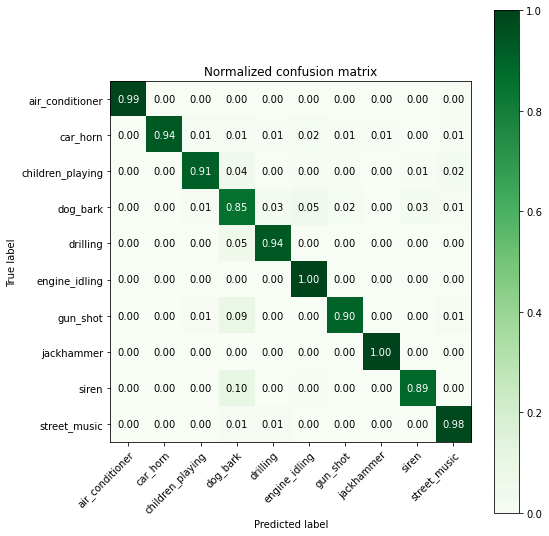

In [63]:
class_names = metadata.groupby(['class', 'classID'], as_index = False).sum()['class']
plot_confusion_matrix(y_train, y_pred_train, classes=class_names, cmap=plt.cm.Greens,\
                      normalize= True)
plt.show()

Normalized confusion matrix


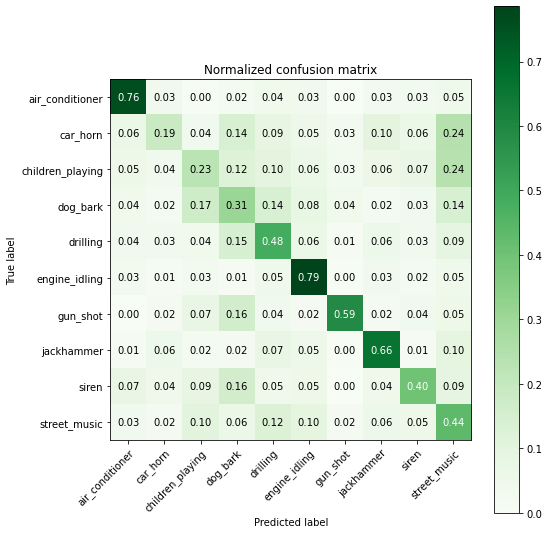

In [64]:
class_names = metadata.groupby(['class', 'classID'], as_index = False).sum()['class']
plot_confusion_matrix(y_test, y_pred_test, classes=class_names, cmap=plt.cm.Greens,\
                      normalize= True)
plt.show()

# 데이터 확인

In [29]:
audio, sample_rate = librosa.load('./audio/fold1/7061-6-0-0.wav', res_type='kaiser_best')

In [30]:
audio = librosa.resample(audio, sample_rate, 256)

Text(0.5, 1.0, 'Power spectrum')

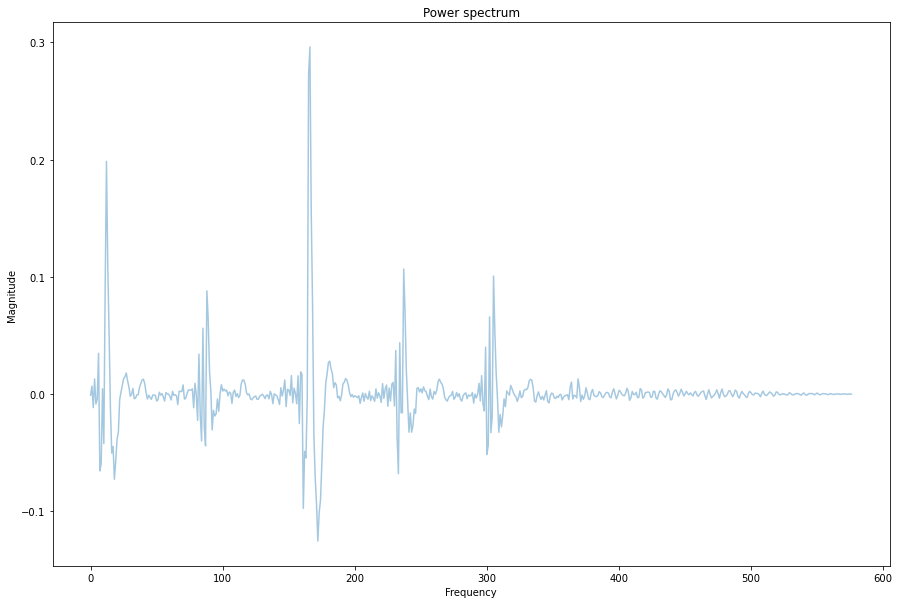

In [31]:
fig_size = (15, 10)
plt.figure(figsize = fig_size)
plt.plot(audio, alpha = 0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Power spectrum')

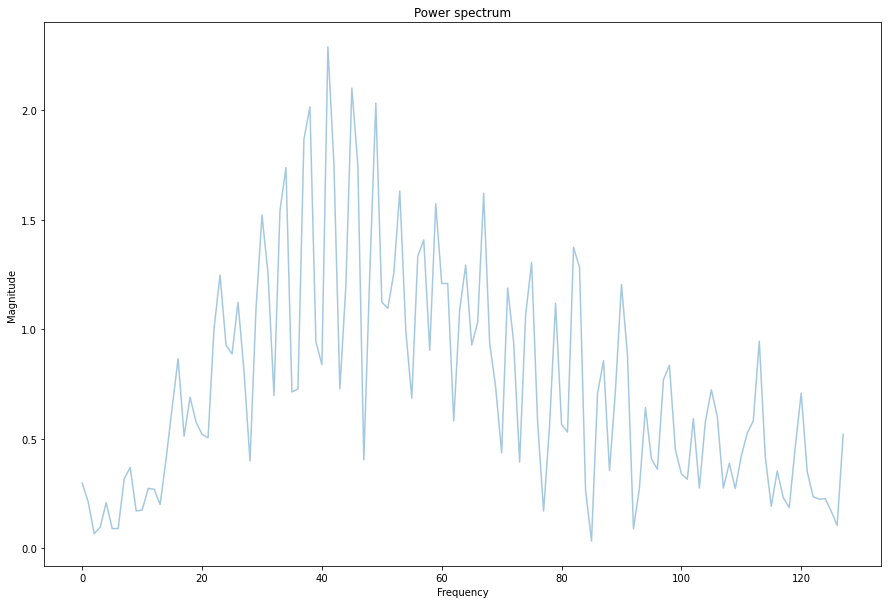

In [34]:
fig_size = (15, 10)
plt.figure(figsize = fig_size)
plt.plot(np.abs(np.fft.fft(audio)[:128]), alpha = 0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model_rf = RandomForestClassifier(n_estimators=100, bootstrap=True,\
                                  max_depth=None,max_leaf_nodes=None,\
                                  max_features='auto')

In [111]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
print(model_rf.score(x_train, y_train))
print(model_rf.score(x_test, y_test))

1.0
0.09639564124056998


# SVM

In [4]:
import sklearn.svm as svm

In [45]:
model_svm = svm.SVC(kernel = 'rbf', C = 1000000)

In [46]:
data_svm = pd.read_pickle('./data/data_final.pkl')

In [47]:
X = data_svm['feature']
y = data_svm['class_label']

In [48]:
X = np.array(X.tolist(), dtype = np.float64)
y = np.array(y.tolist(), dtype = np.float64)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
model_svm.fit(x_train, y_train)

SVC(C=1000000)

In [51]:
y_pred = model_svm.predict(x_test)
train_acc = model_svm.score(x_train, y_train)
test_acc = model_svm.score(x_test, y_test)
print('Training Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

Training Accuracy: 0.9396334890406036
Test Accuracy: 0.40360435875943
